In [10]:
import pandas as pd
import os
from tqdm import tqdm  # 导入进度条库
import matplotlib.pyplot as plt  


## 函数一：混合情绪分析：认为文本的情绪是混合的，即统计文本中所有情绪词的出现次数，并计算每种情绪的比例。
例如，如果joy出现n1次，总情绪词数为n，则joy的比例为n1/n。
**五类情绪词汇**：
anger、disgust、fear、sadness和joy

**结构**：_闭包_ ，`mix_analyse(analyse_cmd)`

   - 参数1：文件路径，是一个csv，包含列名为`cus_comment`的列，对其中某一行进行文本分析
   - 参数2：`row_index`，表示要分析的行号
   - 参数3：`anaylse_cmd`，表示要分析的命令，可选值有`mix_analyse`和`single_analyse`，类型为整数

**返回**：一个字典，键为每种情绪类型的词汇，值为每个情绪类型的词汇的出现的比例
    

In [ ]:
def emotion_analyse(file_path, row_index, anaylse_cmd = 0):# 默认为混合情绪分析
    
    # 创建情绪字典
    def read_emotion_lexicon():
        '''
        创建情绪字典
        返回：一个字典，键为情绪种类，值为情绪词语的列表
        '''
        input_folder = "emotion_lexicon"
        dict_emotion = {}
        for file_name in os.listdir(input_folder):
            # 由于open函数需要完整的文件路径，必须使用os.path.join函数
            file = os.path.join(input_folder, file_name)
            with open(file, "r", encoding = 'utf-8') as file:
                # 将每个text文档中的每个按照行分割的词汇存储在一个字典中，键为文档的名称，去除后缀'.txt'，值为所有词汇的列表
                lines = file.readlines() # 按行读取，返回一个列表
                lines = [line.strip() for line in lines] # 去除换行符，strip去除字符串首尾的空白字符（包括换行符\n、制表符\t和空格）
                    # 对文档名进行切片操作，去除最后四个字符；按照换行符分割成列表
            dict_emotion[file_name[:-4]] = lines
                
            # 将dict_emotion这个字典挨个连接起来
        return dict_emotion
        
    df = pd.read_csv(file_path)

    column = df['cus_comment'] # 返回一个series
    comment = column[row_index] # 以第一个单元格为例子
    
    # 将comment中的所有按照空格分割的词汇存入一个列表
    comment_list = comment.split()   

    emotion_lexicon = read_emotion_lexicon() 
    
    # 混合/单一情绪分析
    def mix_analyse(analyse_cmd):
        # 创建一个统计频率的字典
        emotion_frequency_dict = {'anger':0, 'disgust':0, 'fear':0, 'sadness':0, 'joy':0}
        # 根据comment_list中的每个词，在emotion_lexicon中查询  
        for word in comment_list:
            for emotion_type in emotion_lexicon:
                if word in emotion_lexicon[emotion_type]:
                    emotion_frequency_dict[emotion_type] +=1
                    
        ### 第二问继续修改代码计算情绪比例，不论情绪词出现次数相同，还是值相同
        sum_frequency = sum(emotion_frequency_dict.values())
        if sum_frequency == 0:
            print('The comment is empty.')
        else :
            anger_proportion = emotion_frequency_dict['anger']/sum_frequency
            disgust_proportion = emotion_frequency_dict['disgust']/sum_frequency
            fear_proportion = emotion_frequency_dict['fear']/sum_frequency
            sadness_proportion = emotion_frequency_dict['sadness']/sum_frequency
            joy_proportion = emotion_frequency_dict['joy']/sum_frequency
            
            emotion_proportion_dict = {'anger':anger_proportion,
                                    'disgust':disgust_proportion,
                                    'fear':fear_proportion,
                                    'sadness':sadness_proportion,
                                    'joy':joy_proportion}
        
        if (analyse_cmd == 0):# 情绪分析模式
            ###（1）函数一：混合情绪分析
            sum_frequency = sum(emotion_frequency_dict.values())
            anger_proportion = emotion_frequency_dict['anger']/sum_frequency
            disgust_proportion = emotion_frequency_dict['disgust']/sum_frequency
            fear_proportion = emotion_frequency_dict['fear']/sum_frequency
            sadness_proportion = emotion_frequency_dict['sadness']/sum_frequency
            joy_proportion = emotion_frequency_dict['joy']/sum_frequency
            print(f"The proportions of each emotion type are:\n anger: {anger_proportion}, disgust: {disgust_proportion}, fear: {fear_proportion}, sadness: {sadness_proportion}, joy: {joy_proportion}")
             
        else:
            ### (2)函数二：单一情绪分析
            
            # 判断最大值有相同的情况，或者值同
            sorted_emotion_frequency_dict = sorted(emotion_frequency_dict.items(), key = lambda x: x[1],reverse = True)
            
            if sorted_emotion_frequency_dict[0] == sorted_emotion_frequency_dict[1]== sorted_emotion_frequency_dict[2] == sorted_emotion_frequency_dict[3]== sorted_emotion_frequency_dict[4]:
                print('The emotional tendency is ambiguous.')
            else:
                # 找出值最大的键然后打印
                max_key = max(emotion_frequency_dict, key=emotion_frequency_dict.get)
                print(f'The emotional tendency is {max_key}') # 正确的格式化插入       
                 
        return emotion_frequency_dict 
        
    
    return mix_analyse

以第 16 位用户的评价为例子分析情绪成分

In [7]:
comment_file = "week3.csv"
emo_ana_fun = emotion_analyse(comment_file, 16, 0)
print("customer id 16:",emo_ana_fun(0)) 

The proportions of each emotion type are:
 anger: 0.07142857142857142, disgust: 0.07142857142857142, fear: 0.0, sadness: 0.21428571428571427, joy: 0.6428571428571429
customer id 16: {'anger': 1, 'disgust': 1, 'fear': 0, 'sadness': 3, 'joy': 9}


## 函数二
再次单独创建情绪字典

In [ ]:
# 创建情绪字典
def read_emotion_lexicon():
    '''
    创建情绪字典
    返回：一个字典，键为情绪种类，值为情绪词语的列表
    '''
    input_folder = "emotion_lexicon"
    dict_emotion = {}
    for file_name in os.listdir(input_folder):
        file = os.path.join(input_folder, file_name)
        with open(file, "r", encoding = 'utf-8') as file:
            # 将每个text文档中的每个按照行分割的词汇存储在一个字典中，键为文档的名称，去除后缀'.txt'，值为所有词汇的列表
            lines = file.readlines() # 按行读取，返回一个列表
            lines = [line.strip() for line in lines] # 去除换行符，strip去除字符串首尾的空白字符（包括换行符\n、制表符\t和空格）
        # 对文档名进行切片操作，去除最后四个字符；按照换行符分割成列表
        dict_emotion[file_name[:-4]] = lines
            
    # 将dict_emotion这个字典挨个连接起来
    return dict_emotion

惰性加载

In [12]:
emotion_lexicon = read_emotion_lexicon()  

### 时间模式分析函数实现。

利用数据集中的评论时间信息，分析不同时间段的情绪比例变化趋势。
实现一个函数，可以通过参数控制来返回指定店铺、指定情绪的时间模式，并可视化呈现这些模式。
例如，可以展示shopID为518986的店铺积极情绪的小时模式，或shopID为520004店铺消极情绪的周模式等。

   - :param 1: shop ID
   - :param 2: time scale (year, month, weekday, hour)
   - :param 3: emotion type (anger、disgust、fear、sadness和joy)

   - :return: time scale analysis result, a picture, none

以小时为例子：
先按照shopID进行筛选，time_scale筛选，对其时间进行升序排列
然后对每个dataframe中的变量为cus_comment的单元格进行情绪词频统计，根据指定情绪类型计算出每小时或者每个时刻的该类型情绪比列，
以小时为横轴，横坐标为0-23，纵坐标为该时间段该情绪比例，画出一张折线图

对于general的time_scale情况而言，就按照传入的time_scale进行判断，是hour就按照hour列为自变量，其他变量忽略，hour 相同的作为一个数据集求出所有评论的情绪比例然后取平均，如果比例分母为0就删除子数据，得出的平均值对应这个hour下的因变量，所有的数据集处理好后形成一个hour为自变量，proportion 为因变量的dataframe然后做出折线图是week就按照weekday列，以此类推

In [13]:
def time_scale_analyse(file_path, shop_id, time_scale, emotion_type):
    # 读入csv表格
    df = pd.read_csv(file_path)
    shop = shop_id
    row_id_filter = df[df['shopID']==shop] # 返回一个series
    
    # 获取time_scale 列的所有值，将重复的值忽略，按照升序排列成一个列表
    time_scale_list = row_id_filter[f'{time_scale}'].unique()
    # 将所有time_scale 列等于time_scale_list中的值的row_index提取出来
    # 初始化一个字典用来存储每个时间段对应的指定情绪比例
    time_scale_list = sorted(map(int, time_scale_list), key=lambda x: x, reverse=False)
    draw_dict = {time: 0 for time in time_scale_list} # 将np整型转化为普通的
    # 存储所有时间段评论中的词语频率，包含所有词汇的词频
    all_types = {time: 0 for time in time_scale_list}
    
    for time in tqdm(time_scale_list, desc="Processing time scale", unit="time"):
        all_words = []
        try:
            time_row_id_filter = row_id_filter[row_id_filter[f'{time_scale}']==time]
            comments = time_row_id_filter['cus_comment']
            comments = comments.dropna()
            # 将comments的所有行的值提取出来，得到一个列表
            for comment in comments:
                # 将评论中的所有词语提取出来，得到一个列表
                if not isinstance(comment, str):
                    continue
                words = comment.split()
                # 将所有评论中的词语汇总到一个列表中
                all_words += words
        
            for word in all_words:
                if word in emotion_lexicon[emotion_type]:
                    # 将该词出现的次数加1
                    draw_dict[time] += 1
                if word in emotion_lexicon['anger'] or word in emotion_lexicon['disgust'] or word in emotion_lexicon['fear'] or word in emotion_lexicon['sadness'] or word in emotion_lexicon['joy']:
                    all_types[time] += 1
            
        except Exception as e:
            print(f"Error processing time scale {time}: {e}")
            
    draw_dict1 = {time: draw_dict[time]/all_types[time] for time in time_scale_list}
    
 
    # 将这个字典转化为一个可以用来画图的series
    draw_df = pd.Series(draw_dict1, index=time_scale_list) 
    # 可视化
    plt.figure(figsize=(10, 6))
    plt.plot(draw_df, color = 'blue', marker = 'o', linestyle = '-')
    # plt.scatter(draw_df.index, draw_df.values[0], color = '#red')
    plt.title(f'{emotion_type} proportion of shopID {shop_id} in {time_scale}',fontsize = 16)
    plt.xlabel(f'{time_scale}',fontsize = 12)
    plt.ylabel(f'{emotion_type} proportion',fontsize = 12)
    plt.xticks(time_scale_list)
    plt.grid(True)
    plt.ylim(0.0,0.05)
    plt.show()          

Processing time scale: 100%|██████████| 12/12 [00:13<00:00,  1.17s/time]


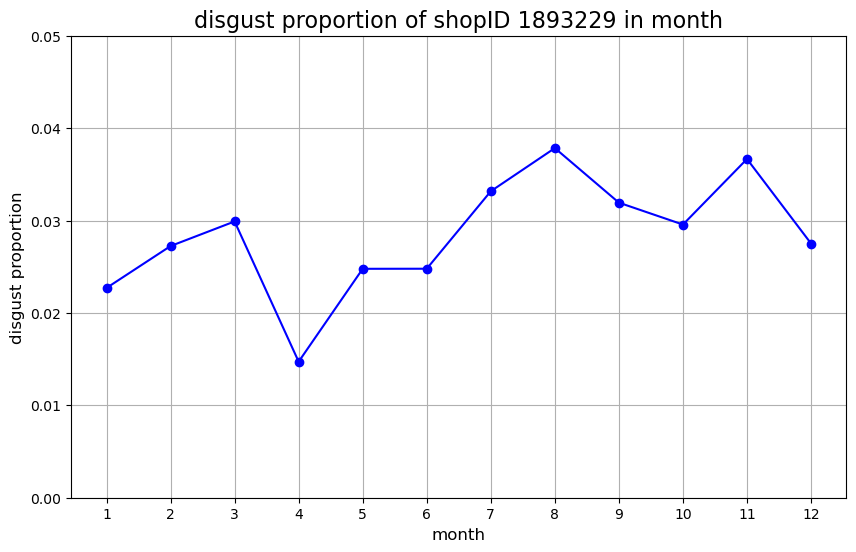

In [14]:
time_scale_analyse(comment_file, 1893229, 'month', 'disgust')

Processing time scale: 100%|██████████| 7/7 [00:15<00:00,  2.19s/time]


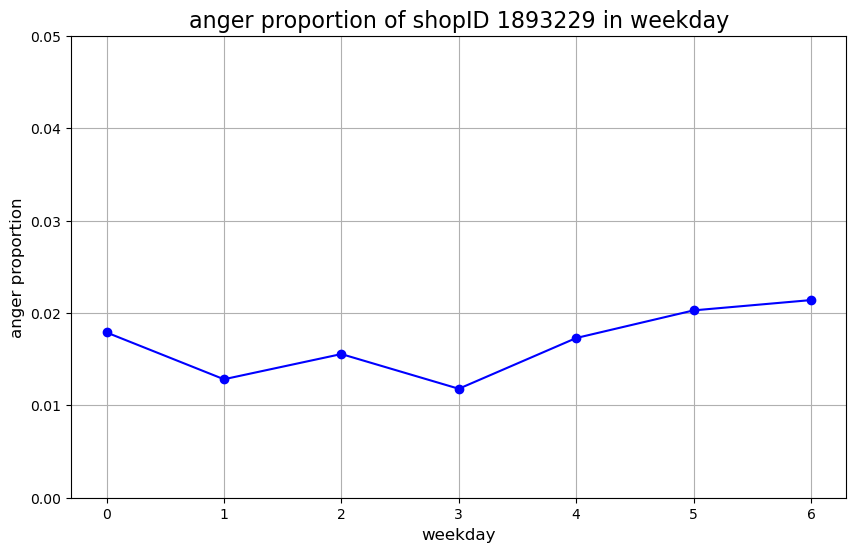

In [15]:
time_scale_analyse(comment_file, 1893229, 'weekday', 'anger')

Processing time scale: 100%|██████████| 13/13 [00:15<00:00,  1.18s/time]


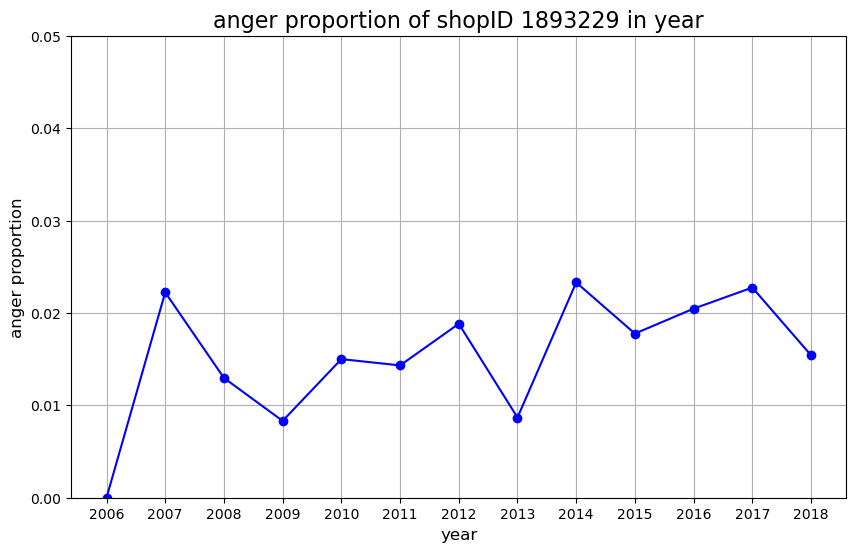

In [16]:
time_scale_analyse(comment_file, 1893229, 'year', 'anger')